In [ ]:
import nltk
nltk.download('all-nltk')

In [ ]:
import os
from pprint import pprint
import requests
import requests.auth
import pandas as pd
import numpy as np
import time
import re
import csv, json
import itertools
from difflib import SequenceMatcher
import datetime
import matplotlib.pyplot as plt
import operator
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import ssl
from urllib.request import urlopen
import glob
import gensim
from gensim.utils import simple_preprocess
import re
from nltk.corpus import stopwords
from time import time
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from pprint import pprint

from numpy import linalg as LA
import math

from copy import deepcopy
from scipy.sparse import csr_matrix, vstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from scipy.linalg import get_blas_funcs
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
from sklearn import metrics
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import itertools
from collections import Counter

stopWords = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])# Do lemmatization keeping only noun, adj, vb, adv

desired_width=320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns',25)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
stop_words = stopwords.words('english')
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

monthDict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
def displayQuestionAnswerDistribution():
    a4_dims = (11.7, 8.27)
    smaller_dim = (8, 4.5)
    fig, ax = plt.subplots(figsize=smaller_dim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    df_questions_gbtools = df_questions.groupby('toolname').count()
    df_questions_gbtools.reset_index(inplace=True)
    df_answers_gbtools = df_answers.groupby('toolname').count()
    df_answers_gbtools.reset_index(inplace=True)

    toollabels = df_questions_gbtools.loc[:,'toolname'].values.tolist()
    toolquestioncount = []
    toolanswercount =[]
    for tool in toollabels:
        toolquestioncount.append(df_questions_gbtools.loc[df_questions_gbtools['toolname']==tool, 'question_id'].values[0])
        toolanswercount.append(df_answers_gbtools.loc[df_answers_gbtools['toolname']==tool, 'answer_id'].values[0])
    x = np.arange(len(toollabels))
    width = 0.35
    rect1 = ax.bar(x - width/2, toolquestioncount, width, label='Questions')
    rect2 = ax.bar(x + width/2, toolanswercount, width, label='Answers')

    plt.title("Question and Answer Numbers for each Tool")
    plt.xlabel("Tools")
    plt.ylabel("Number")
    ax.set_xticks(x)
    ax.set_xticklabels(toollabels, rotation='vertical')
    ax.legend()
    ax.bar_label(rect1, padding=3)
    ax.bar_label(rect2, padding=3)
    fig.tight_layout()
    plt.savefig('QAdistribution.png', bbox_inches='tight')
    plt.show()

def displayQuestionAnswerMediumDZoneDistribution():
    a4_dims = (11.7, 8.27)
    smaller_dim = (8, 4.5)
    fig, ax = plt.subplots(figsize=smaller_dim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    df_questions_gbtools = df_questions.groupby('toolname').count()
    df_questions_gbtools.reset_index(inplace=True)
    df_answers_gbtools = df_answers.groupby('toolname').count()
    df_answers_gbtools.reset_index(inplace=True)

    toollabels = df_questions_gbtools.loc[:,'toolname'].values.tolist()
    toolquestioncount = []
    toolanswercount =[]
    for tool in toollabels:
        toolquestioncount.append(df_questions_gbtools.loc[df_questions_gbtools['toolname']==tool, 'question_id'].values[0])
        toolanswercount.append(df_answers_gbtools.loc[df_answers_gbtools['toolname']==tool, 'answer_id'].values[0])
    x = np.arange(len(toollabels))
    width = 0.15
    rect1 = ax.bar(x - width*1.5, toolquestioncount, width, label='StackOverflow Qs.')
    rect2 = ax.bar(x - width/2, toolanswercount, width, label='StackOverflow As.')

    mediumpostcount = [25,139,4,1,9,65,1,2,1,28,51]
    dzonepostcount = [339,170,70,4,46,104,38,4,1,12,171]
    rect3 = ax.bar(x + width/2, mediumpostcount, width, label='Medium Articles')
    rect4 = ax.bar(x + width*1.5, dzonepostcount, width, label='DZone Articles')

    plt.title("Social Media Content Volume for each Tool")
    plt.xlabel("Tools")
    plt.ylabel("Number")
    ax.set_xticks(x)
    ax.set_xticklabels(toollabels, rotation='vertical')
    ax.legend()
    ax.bar_label(rect1, padding=3, rotation='vertical', fontsize=8)
    ax.bar_label(rect2, padding=3, rotation='vertical', fontsize=8)
    ax.bar_label(rect3, padding=3, rotation='vertical', fontsize=8)
    ax.bar_label(rect4, padding=3, rotation='vertical', fontsize=8)
    fig.tight_layout()
    plt.savefig('QAMDdistribution.png', bbox_inches='tight')
    plt.show()

def fromParagrph2SentenceListUpdated(thestring):
    prelist = thestring.split('</p>')[:-1]
    plist = []
    for item in prelist:
        if '<p>' not in item:
            plist.append(item)
        elif len(item.split('<p>'))>1:
            plist.append(' '.join(item.split('<p>')[1:]))
        else:
            plist.append(item.split('<p>')[1])
    #plist = [x.split('<p>')[1] for x in prelist]
    sentences = []
    for p in plist:
        temp = str(p).split('>')
        temp_cleaned = []
        for piece in temp:
            if '<' in piece:
                if piece.split('<')[0]:
                    temp_cleaned.append(piece.split('<')[0])
                else:
                    continue
            else:
                temp_cleaned.append(piece)
        cleanedsent = ' '.join(temp_cleaned)
        tsents = sent_tokenize(str(cleanedsent))
        for sent in tsents:
            if '<a' in sent:
                if sent.split('<a')[0]:
                    sentences.append(sent.split('<a')[0] + sent.split('/a>')[-1])
                else:
                    continue
            elif '<img' in sent:
                if sent.split('<img')[0]:
                    sentences.append(sent.split('<img')[0] + sent.split('/img>')[-1])
                else:
                    continue
            else:
                sentences.append(sent)
    return sentences

def getSentenceLevelDataset4Questions():
    question_features = ['toolname', 'question_id', 'accepted_answer_id', 'answer_count', 'creation_date',
                         'is_answered', 'last_activity_date', 'last_edit_date', 'owner_id', 'owner_reputation', 'score',
                         'view_count', 'title', 'sentence']
    with open('questions_sents.csv', 'a') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(question_features)
    questionlen = df_questions.shape[0]
    for i in range(questionlen):
        questionitem = df_questions.iloc[i].values.tolist()
        sentences = fromParagrph2SentenceListUpdated(questionitem[-1])
        for sent in sentences:
            with open('questions_sents.csv', 'a', encoding='utf-8') as csvfile:
                writer = csv.writer(csvfile, delimiter=',')
                questionitem = questionitem[:-1]+[sent]
                writer.writerow(questionitem)

def getSentenceLevelDataset4Answers():
    answer_features = ['toolname', 'answer_id', 'question_id', 'comment_count', 'creation_date', 'is_accepted',
                       'last_activity_date', 'owner_reputation', 'owner_id', 'score', 'sentence']
    with open('answers_sents.csv', 'a') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(answer_features)
    answerlen = df_answers.shape[0]
    for i in range(answerlen):
        answeritem = df_answers.iloc[i].values.tolist()
        sentences = fromParagrph2SentenceListUpdated(answeritem[-1])
        for sent in sentences:
            with open('answers_sents.csv', 'a', encoding='utf-8') as csvfile:
                writer = csv.writer(csvfile, delimiter=',')
                answeritem = answeritem[:-1]+[sent]
                writer.writerow(answeritem)

def sentimentanalysis(np_textarray):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(np_textarray)
    return ss

def addsentimentvalues(pd_reviews):
    pd_reviews['ss'] = pd_reviews['sentence'].apply(str).apply(sentimentanalysis)
    np_ss = list(pd_reviews['ss'].to_numpy())
    neg = []
    pos = []
    neu = []
    com = []
    for item in np_ss:
        neg.append(item['neg'])
        pos.append(item['pos'])
        neu.append(item['neu'])
        com.append(item['compound'])
    pd_reviews['neg'] = neg
    pd_reviews['pos'] = pos
    pd_reviews['neu'] = neu
    pd_reviews['com'] = com
    return pd_reviews.drop(['ss'], axis=1)

def readStaticHTMLArticle(thelink):
    html = urlopen(thelink, context=context)
    bsObj = BeautifulSoup(html.read(), 'lxml')
    textitems = bsObj.find('script', {'type': 'application/ld+json'}).contents
    #jsondata = json.load(textitems[0])
    #print(type(textitems[0]))
    #print(bsObj.prettify())
    data = json.loads(textitems[0].strip())
    return data['articleBody']
    #for item in textitems:
    #    print(item)

def fromtextlist2csv(toolappname):
    with open(toolappname+'.txt', 'r', encoding='utf-8') as txtfile:
        linklist = [x.strip('\n') for x in txtfile.readlines()]
    features = ['tool', 'text']
    count = 0
    for item in linklist:
        html = urlopen(item, context=context)
        bsObj = BeautifulSoup(html.read(), 'lxml')
        thetitle = bsObj.find('h1', {'class': 'article-title'}).get_text()
        thecontent = bsObj.find('div', {'class': 'content-html'}).get_text()
        #thetime = bsObj.find('span', {'class': 'author-date'}).get_text()
        #thetime = pd.to_datetime('20'+thetime.split(', ')[-1]+'-'+monthDict[thetime.split('. ')[0]]+'-'+thetime.split(', ')[0].split('. ')[1])
        with open('dzone.csv', 'a', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile, delimiter=',')
            writer.writerow([toolappname, (thetitle + thecontent)])
        count += 1
        print(toolappname+str(count))

def mediumfromtextlist2csv(toolappname):
    ########### Clean Text
    selected = [x for x in medium_all_files if toolappname in x]
    count = 0
    for article in selected:
        with open(article, 'r', encoding='utf-8') as txtfile:
            text = txtfile.read()
        if "min read" in text:
            textmain = text.split("min read")[1]
            textmain = textmain.strip()
        else:
            textmain = text.strip()
        with open('medium.csv', 'a', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile, delimiter=',')
            writer.writerow([toolappname, textmain])
        count += 1
        print(toolappname+str(count))

def getSentenceLevelDatasetAndTxtMedium():
    df = pd.read_csv('medium.csv')
    for i in range(df.shape[0]):
        print(i+1)
        tempair = df.iloc[i].values.tolist()
        thetext = tempair[1]
        sentlist = sent_tokenize(thetext)
        sentlist = [str(x).strip('\n').strip('\r') for x in sentlist]
        for sent in sentlist:
            with open('medium_sents.csv', 'a', encoding='utf-8') as csvfile:
                writer = csv.writer(csvfile, delimiter=',')
                writer.writerow([tempair[0], sent])
            with open('medium_sentlist.txt', 'a', encoding='utf-8') as txtfile:
                txtfile.write(sent + '\n')

def getSentenceLevelDatasetAndTxtDzone():
    df = pd.read_csv('dzone.csv')
    for i in range(df.shape[0]):
        print(i+1)
        tempair = df.iloc[i].values.tolist()
        thetext = tempair[1]
        sentlist = sent_tokenize(thetext)
        sentlist = [str(x).strip('\n').strip('\r') for x in sentlist]
        for sent in sentlist:
            with open('dzone_sents.csv', 'a', encoding='utf-8') as csvfile:
                writer = csv.writer(csvfile, delimiter=',')
                writer.writerow([tempair[0], sent])
            with open('dzone_sentlist.txt', 'a', encoding='utf-8') as txtfile:
                txtfile.write(sent + '\n')

#for item in ['appdynamics', 'datadog', 'elasticapm', 'inspectit', 'instana', 'jaeger', 'lightstep', 'skywalking', 'stagemonitor', 'tanzu', 'zipkin']:
#    mediumfromtextlist2csv(item)
# {'Wavefront VMware', 'Jaeger', 'Datadog', 'InspectIT', 'Zipkin', 'Instana', 'SkyWalking', 'LightStep', 'AppDynamics', 'Elastic APM', 'Stagemonitor'}

def regularizeToolname(thestr):
    if thestr == 'Wavefront VMware':
        return 'tanzu'
    else:
        return ''.join(thestr.split()).lower()

def getSentenceLevelDatasetAndTxtStackOverflow():
    df_questions_sent['tool'] = df_questions_sent['toolname'].apply(regularizeToolname)
    df_questions_sent_reg = df_questions_sent.loc[:,['tool', 'sentence']]
    df_answers_sent['tool'] = df_answers_sent['toolname'].apply(regularizeToolname)
    df_answers_sent_reg = df_answers_sent.loc[:, ['tool', 'sentence']]
    df_stack = pd.concat([df_questions_sent_reg,df_answers_sent_reg])
    df_stack.to_csv('stackoverflow_sents.csv', index=False)
    sentlist = df_stack['sentence'].values.tolist()
    for sent in sentlist:
        with open('stackoverflow_sentlist.txt', 'a', encoding='utf-8') as txtfile:
            txtfile.write(sent + '\n')

def removeSpecialCharacters(s):
    stripped = re.sub('[^\w\s]', '', s)
    stripped = re.sub('_', '', stripped)
    stripped = re.sub('\s+', ' ', stripped)
    stripped = stripped.strip()
    return stripped

def remove_noise2(sentence):
    result = ''
    poster = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stopword_set = set(stopwords.words('english'))
    wordlist = re.sub(r"\n|(\\(.*?){)|}|[!$%^&*#()_+|~\-={}\[\]:\";'<>?,.\/\\]|[0-9]|[@]", ' ', sentence) # remove punctuation
    wordlist = re.sub('\s+', ' ', wordlist) # remove extra space
    return wordlist

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

s_csv = '1DNXObCioIK3J-sSosaL_Nc4pSGabrJ-H'
m_csv = '1ZK-DdgJYbLFPFhNuh85kuT4TupsJnMyt'
d_csv = '1OrB7bdf0umwpXRsXRGNbWjsRLbkavXTL'
info = '1lLj29Z2_6g9YPl4g7JsWWQeoZERh0UEJ'
noninfo = '1eKExgxj5uC5iSwPxGssX9K8JDvBoQkcQ'
issue = '1W-A5GWrNrWnPZN-Dw9yDVweCqLduDf14'
benefit = '19r4oz5V37VsvL3jW4PQHIcSco6t_6p0k'
motivation = '1xiqCIBSWhhVaf3bGasgtZeRgcfHVZHpn'
infoaspect = '1s6cdHTawDUqaZkeY1pir177Bn4QExSmN'
info_new = '17iMseVamQpbQX3PzGwfmXtLq-JoUYh8G'

downloaded = drive.CreateFile({'id':s_csv}) 
downloaded.GetContentFile('stackoverflow_sents_ss.csv')
downloaded = drive.CreateFile({'id':m_csv}) 
downloaded.GetContentFile('medium_sents_ss.csv')
downloaded = drive.CreateFile({'id':d_csv}) 
downloaded.GetContentFile('dzone_sents_ss.csv')
downloaded = drive.CreateFile({'id':info}) 
downloaded.GetContentFile('informative.txt')
downloaded = drive.CreateFile({'id':noninfo}) 
downloaded.GetContentFile('noninformative.txt')
downloaded = drive.CreateFile({'id':issue}) 
downloaded.GetContentFile('issue.txt')
downloaded = drive.CreateFile({'id':benefit}) 
downloaded.GetContentFile('benefit.txt')
downloaded = drive.CreateFile({'id':motivation}) 
downloaded.GetContentFile('motivation.txt')
downloaded = drive.CreateFile({'id':infoaspect}) 
downloaded.GetContentFile('sents_info_aspect.csv')

downloaded = drive.CreateFile({'id':info_new}) 
downloaded.GetContentFile('sents_info_new.csv')

modelid1 = "1R2t3pdStqIYRnSt91jR21NxldSekVObl"
modelid2 = "1Yav7krPtbvB8bjyfOmePPMqvQ5mKwY0B"
modelid3 = "18ErK0X3vBXCesJjg47mj3xA6YHgWGn3U"
modelid4 = "1JnTAzb1EBlUFmnV5WwjpbSltHwSiPXoA"

downloaded = drive.CreateFile({'id':modelid1}) 
downloaded.GetContentFile('12topicmodel')
downloaded = drive.CreateFile({'id':modelid2}) 
downloaded.GetContentFile('12topicmodel.expElogbeta.npy')
downloaded = drive.CreateFile({'id':modelid3}) 
downloaded.GetContentFile('12topicmodel.id2word')
downloaded = drive.CreateFile({'id':modelid4}) 
downloaded.GetContentFile('12topicmodel.state')

df_medium = pd.read_csv('medium_sents_ss.csv')
df_dzone = pd.read_csv('dzone_sents_ss.csv')
df_stack = pd.read_csv('stackoverflow_sents_ss.csv')
df_info = pd.read_csv('sents_info_new.csv', lineterminator='\n')
with open('informative.txt', 'r', encoding='utf-8') as txtfile:
    inlist = [x.strip('\n') for x in txtfile.readlines()]
with open('noninformative.txt', 'r', encoding='utf-8') as txtfile:
    nlist = [x.strip('\n') for x in txtfile.readlines()]
with open('motivation.txt', 'r', encoding='utf-8') as txtfile:
    mlist = [x.strip('\n') for x in txtfile.readlines()]
with open('benefit.txt', 'r', encoding='utf-8') as txtfile:
    blist = [x.strip('\n') for x in txtfile.readlines()]
with open('issue.txt', 'r', encoding='utf-8') as txtfile:
    islist = [x.strip('\n') for x in txtfile.readlines()]

In [ ]:
df_info = df_info.loc[df_info['informative']==1,:]

In [ ]:
df_info.shape

(47439, 8)

In [ ]:
train_data_n = []
train_target_n = []
test_data_n = []
test_target_n = []

for i in range(1500):
    train_data_n.append(nlist[i])
    train_data_n.append(inlist[i])
    #train_data_n.append(mlist[i])
    #train_data_n.append(blist[i])
    #train_data_n.append(islist[i])
    train_target_n.extend([0,1])
for i in range(750,1500):
    test_data_n.append(nlist[i])
    test_data_n.append(inlist[i])
    #test_data_n.append(mlist[i])
    #test_data_n.append(blist[i])
    #test_data_n.append(islist[i])
    test_target_n.extend([0,1])

test_target_n = np.array(test_target_n)
train_target_n = np.array(train_target_n)
stop_words = stopwords.words('english')

<h1>***********</h1>
<h1>HERE is NB Testing</h1>
<h1>***********</h1>

In [ ]:
def remove_noise(sentence):
    result = ''
    poster = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stopword_set = set(stopwords.words('english'))
    wordlist = re.sub(r"\n|(\\(.*?){)|}|[!$%^&*#()_+|~\-={}\[\]:\";'<>?,.\/\\]|[0-9]|[@]", ' ', sentence) # remove punctuation
    wordlist = re.sub('\s+', ' ', wordlist) # remove extra space
    wordlist_normal = [poster.stem(word.lower()) for word in wordlist.split()] # restore word to its original form (stemming)
    wordlist_normal = [lemmatizer.lemmatize(word, pos='v') for word in wordlist_normal] # restore word to its root form (lemmatization)
    wordlist_clean = [word for word in wordlist_normal if word not in stopword_set] # remove stopwords
    result = ' '.join(wordlist_clean)
    return result

def cross_validation(clf, data_X, data_y, unlabeled=None, n_folds=5):
    print('=' * 80)
    print("Validation: ")
    print(clf)
    kf = StratifiedKFold(n_splits=n_folds)
    start_time = time()
    train_accuracies= list() # training accuracy
    fold_count = 1
    original_clf = deepcopy(clf)
    for train_ids, valid_ids in kf.split(data_X, data_y):
        cv_clf = deepcopy(original_clf)
        print("Fold # %d" % fold_count)
        fold_count += 1
        #print(train_ids, valid_ids)
        train_X = data_X[train_ids]
        train_y = data_y[train_ids]
        valid_X = data_X[valid_ids]
        valid_y = data_y[valid_ids]
        if unlabeled==None:
            cv_clf.fit(train_X, train_y)
        else:
            cv_clf.fit(train_X, train_y, unlabeled)
        pred = cv_clf.predict(valid_X)
        train_accuracies.append(metrics.accuracy_score(valid_y, pred))
    train_time = time() - start_time
    print("Validation time: %0.3f seconds" % train_time)
    print("Average training accuracy: %0.3f" % np.mean(np.array(train_accuracies)))
    return train_accuracies, train_time

In [ ]:
train_data_clean = map(remove_noise, train_data_n)
test_data_clean = map(remove_noise, test_data_n)
# Convert all text data into tf-idf vectors
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.95)
# vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(train_data_clean)
test_vec = vectorizer.transform(test_data_clean)

In [ ]:
train_vec

<3000x1011 sparse matrix of type '<class 'numpy.float64'>'
	with 22958 stored elements in Compressed Sparse Row format>

In [ ]:
train_data_clean = map(remove_noise, train_data_n)
test_data_clean = map(remove_noise, test_data_n)
# Convert all text data into tf-idf vectors
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.95)
# vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(train_data_clean)
test_vec = vectorizer.transform(test_data_clean)
print(train_vec.shape, test_vec.shape)
n_train_data = train_vec.shape[0]
split_ratio = 0.25 # labeled vs total(labeled+unlabeled)
X_l, X_u, y_l, y_u = train_test_split(train_vec, np.array(train_target_n), test_size=split_ratio, stratify=np.array(train_target_n))
print(X_l.shape, X_u.shape)
nb_clf = MultinomialNB(alpha=1e-2)
cross_validation(nb_clf, X_l, y_l)
nb_clf = MultinomialNB(alpha=1e-2).fit(X_l, y_l)
pred = nb_clf.predict(test_vec)
print(metrics.classification_report(np.array(test_target_n), pred, target_names=['non-info','info']))
# pprint(metrics.confusion_matrix(test_Xy.target, pred))
print(metrics.accuracy_score(np.array(test_target_n), pred))

(3000, 1011) (1500, 1011)
(2250, 1011) (750, 1011)
Validation: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
Fold # 1
Fold # 2
Fold # 3
Fold # 4
Fold # 5
Validation time: 0.017 seconds
Average training accuracy: 0.739
              precision    recall  f1-score   support

    non-info       0.84      0.84      0.84       750
        info       0.84      0.84      0.84       750

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500

0.8393333333333334


In [ ]:
# Import packages and libraries
import numpy as np
import random as rnd
import nltk

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from pprint import pprint

from copy import deepcopy
from scipy.sparse import csr_matrix, vstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from scipy.linalg import get_blas_funcs
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import matplotlib.pyplot as plt


class Semi_EM_MultinomialNB():
    """
    Naive Bayes classifier for multinomial models for semi-supervised learning.
    
    Use both labeled and unlabeled data to train NB classifier, update parameters
    using unlabeled data, and all data to evaluate performance of classifier. Optimize
    classifier using Expectation-Maximization algorithm.
    """
    def __init__(self, alpha=1.0, fit_prior=True, class_prior=None, max_iter=30, tol=1e-6, print_log_lkh=True):
        self.alpha = alpha
        self.fit_prior = fit_prior
        self.class_prior = class_prior
        self.clf = MultinomialNB(alpha=self.alpha, fit_prior=self.fit_prior, class_prior=self.class_prior)
        self.log_lkh = -np.inf # log likelihood
        self.max_iter = max_iter # max number of EM iterations
        self.tol = tol # tolerance of log likelihood increment
        self.feature_log_prob_ = np.array([]) # Empirical log probability of features given a class, P(x_i|y).
        self.coef_ = np.array([]) # Mirrors feature_log_prob_ for interpreting MultinomialNB as a linear model.
        self.print_log_lkh = print_log_lkh # if True, print log likelihood during EM iterations

    def fit(self, X_l, y_l, X_u):
        """
        Initialize the parameter using labeled data only.
        Assume unlabeled class as missing values, apply EM on unlabeled data to refine classifier.
        """
        n_ul_docs = X_u.shape[0] # number of unlabeled samples
        n_l_docs = X_l.shape[0] # number of labeled samples
        # initialization (n_docs = n_ul_docs)
        clf = deepcopy(self.clf)# build new copy of classifier
        clf.fit(X_l, y_l) # use labeled data only to initialize classifier parameters
        prev_log_lkh = self.log_lkh # record log likelihood of previous EM iteration
        lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
        b_w_d = (X_u > 0) # words in each document [n_docs, n_words]
        lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.T.toarray()]) # log CP of doc given class [n_classes, n_docs]
        lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.T.toarray()) 
        lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
        lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
        lp_dc = lp_d_c + lp_c # joint prob of doc and class [n_classes, n_docs]
        p_c_d = clf.predict_proba(X_u) # weight of each class in each doc [n_docs, n_classes]
        expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
        expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
        self.clf = deepcopy(clf)
        self.log_lkh = expectation
        if self.print_log_lkh:
            print("Initial expected log likelihood = %0.3f\n" % expectation)
        # Loop until log likelihood does not improve
        iter_count = 0 # count EM iteration
        while (self.log_lkh-prev_log_lkh>=self.tol and iter_count<self.max_iter):
        # while (iter_count<self.max_iter):
            iter_count += 1
            if self.print_log_lkh:
                print("EM iteration #%d" % iter_count) # debug
            # E-step: Estimate class membership of unlabeled documents
            y_u = clf.predict(X_u)
            # M-step: Re-estimate classifier parameters
            X = vstack([X_l, X_u])
            y = np.concatenate((y_l, y_u), axis=0)
            clf.fit(X, y)
            # check convergence: update log likelihood
            p_c_d = clf.predict_proba(X_u)
            lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
            b_w_d = (X_u > 0) # words in each document
            lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.transpose().toarray()]) # log CP of doc given class [n_classes, n_docs]
            lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.transpose().toarray()) 
            lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
            lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
            lp_dc = lp_d_c + lp_c  # joint prob of doc and class [n_classes, n_docs]
            expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
            expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
            if self.print_log_lkh:
                print("\tExpected log likelihood = %0.3f" % expectation)
            if (expectation-self.log_lkh >= self.tol):
                prev_log_lkh = self.log_lkh
                self.log_lkh = expectation
                self.clf = deepcopy(clf)
            else:
                break
        self.feature_log_prob_ = self.clf.feature_log_prob_
        self.coef_ = self.clf.coef_
        return self

    def fit_with_clustering(self, X_l, y_l, X_u, y_u=None):
        """
        Initialize the parameter using both labeled and unlabeled data.
        The classes of unlabeled data are assigned using similarity with labeled data.
        Assume unlabeled class as missing values, apply EM on unlabeled data to refine classifier.
        The label propagation can only use dense matrix, so it is quite time consuming.
        """
        n_ul_docs = X_u.shape[0] # number of unlabeled samples
        n_l_docs = X_l.shape[0] # number of labeled samples
        # initialization (n_docs = n_ul_docs): 
        # assign class to unlabeled data using similarity with labeled data if y_u is not given
        if (y_u==None):
            label_prop_model = LabelSpreading(kernel='rbf', max_iter=5, n_jobs=-1)
            y_u = np.array([-1.0]*n_ul_docs)
            X = vstack([X_l, X_u])
            y = np.concatenate((y_l, y_u), axis=0)
            label_prop_model.fit(X.toarray(), y)
            y_u = label_prop_model.predict(X_u.toarray())
        y = np.concatenate((y_l, y_u), axis=0)
        clf = deepcopy(self.clf)# build new copy of classifier
        clf.fit(X, y) # use labeled data only to initialize classifier parameters
        prev_log_lkh = self.log_lkh # record log likelihood of previous EM iteration
        lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
        b_w_d = (X_u > 0) # words in each document [n_docs, n_words]
        lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.T.toarray()]) # log CP of doc given class [n_classes, n_docs]
        lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.T.toarray()) 
        lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
        lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
        lp_dc = lp_d_c + lp_c # joint prob of doc and class [n_classes, n_docs]
        p_c_d = clf.predict_proba(X_u) # weight of each class in each doc [n_docs, n_classes]
        expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
        expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
        self.clf = deepcopy(clf)
        self.log_lkh = expectation
        if self.print_log_lkh:
            print("Initial expected log likelihood = %0.3f\n" % expectation)
        # Loop until log likelihood does not improve
        iter_count = 0 # count EM iteration
        while (self.log_lkh-prev_log_lkh>=self.tol and iter_count<self.max_iter):
        # while (iter_count<self.max_iter):
            iter_count += 1
            if self.print_log_lkh:
                print("EM iteration #%d" % iter_count) # debug
            # E-step: Estimate class membership of unlabeled documents
            y_u = clf.predict(X_u)
            # M-step: Re-estimate classifier parameters
            X = vstack([X_l, X_u])
            y = np.concatenate((y_l, y_u), axis=0)
            clf.fit(X, y)
            # check convergence: update log likelihood
            p_c_d = clf.predict_proba(X_u)
            lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
            b_w_d = (X_u > 0) # words in each document
            lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.transpose().toarray()]) # log CP of doc given class [n_classes, n_docs]
            lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.transpose().toarray()) 
            lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
            lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
            lp_dc = lp_d_c + lp_c  # joint prob of doc and class [n_classes, n_docs]
            expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
            expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
            if self.print_log_lkh:
                print("\tExpected log likelihood = %0.3f" % expectation)
            if (expectation-self.log_lkh >= self.tol):
                prev_log_lkh = self.log_lkh
                self.log_lkh = expectation
                self.clf = deepcopy(clf)
            else:
                break
        self.feature_log_prob_ = self.clf.feature_log_prob_
        self.coef_ = self.clf.coef_
        return self

    def partial_fit(self, X_l, y_l, X_u=np.array([])):
        """
        Initialize the parameter using labeled data only.
        Assume unlabeled class as missing values, apply EM on unlabeled data to refine classifier.
        This function can only be used after fit()
        """
        n_ul_docs = X_u.shape[0] # number of unlabeled samples
        n_l_docs = X_l.shape[0] # number of labeled samples
        # initialization (n_docs = n_ul_docs)
        clf = deepcopy(self.clf)# build new copy of classifier
        clf.partial_fit(X_l, y_l) # use labeled data only to initialize classifier parameters
        prev_log_lkh = self.log_lkh # record log likelihood of previous EM iteration
        lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
        b_w_d = (X_u > 0) # words in each document [n_docs, n_words]
        lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.T.toarray()]) # log CP of doc given class [n_classes, n_docs]
        lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.T.toarray()) 
        lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
        lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
        lp_dc = lp_d_c + lp_c # joint prob of doc and class [n_classes, n_docs]
        p_c_d = clf.predict_proba(X_u) # weight of each class in each doc [n_docs, n_classes]
        expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
        expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
        self.clf = deepcopy(clf)
        self.log_lkh = expectation
        print("Initial expected log likelihood = %0.3f\n" % expectation)
        # Loop until log likelihood does not improve
        iter_count = 0 # count EM iteration
        while (self.log_lkh-prev_log_lkh>=self.tol and iter_count<self.max_iter):
        # while (iter_count<self.max_iter):
            iter_count += 1
            print("EM iteration #%d" % iter_count) # debug
            # E-step: Estimate class membership of unlabeled documents
            y_u = clf.predict(X_u)
            # M-step: Re-estimate classifier parameters
            X = vstack([X_l, X_u])
            y = np.concatenate((y_l, y_u), axis=0)
            clf.partial_fit(X, y)
            # check convergence: update log likelihood
            p_c_d = clf.predict_proba(X_u)
            lp_w_c = clf.feature_log_prob_ # log CP of word given class [n_classes, n_words]
            b_w_d = (X_u > 0) # words in each document
            lp_d_c = get_blas_funcs("gemm", [lp_w_c, b_w_d.transpose().toarray()]) # log CP of doc given class [n_classes, n_docs]
            lp_d_c = lp_d_c(alpha=1.0, a=lp_w_c, b=b_w_d.transpose().toarray()) 
            lp_c = np.matrix(clf.class_log_prior_).T # log prob of classes [n_classes, 1]
            lp_c = np.repeat(lp_c, n_ul_docs, axis=1) # repeat for each doc [n_classes, n_docs]
            lp_dc = lp_d_c + lp_c  # joint prob of doc and class [n_classes, n_docs]
            expectation = get_blas_funcs("gemm", [p_c_d, lp_dc]) # expectation of log likelihood over all unlabeled docs
            expectation = expectation(alpha=1.0, a=p_c_d, b=lp_dc).trace() 
            print("\tExpected log likelihood = %0.3f" % expectation)
            if (expectation-self.log_lkh >= self.tol):
                prev_log_lkh = self.log_lkh
                self.log_lkh = expectation
                self.clf = deepcopy(clf)
            else:
                break
        self.feature_log_prob_ = self.clf.feature_log_prob_
        self.coef_ = self.clf.coef_
        return self

    def predict(self, X):
        return self.clf.predict(X)

    def score(self, X, y):
        return self.clf.score(X, y)

    def get_params(deep=True):
        return self.clf.get_params(deep)

    def __str__(self):
        return self.clf.__str__()

In [ ]:
nbperform = []
nbemperform = []
for i in range(100, 1001, 20):
    vectorizer = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.9)
    # vectorizer = TfidfVectorizer()
    train_vec = vectorizer.fit_transform(train_data_n[:i*2])
    test_vec = vectorizer.transform(test_data_n[:(i)])
    #print(train_vec.shape, test_vec.shape)
    # Divide train data set into labeled and unlabeled data sets
    n_train_data = train_vec.shape[0]
    split_ratio = 0.25 # labeled vs unlabeled
    X_l, X_u, y_l, y_u = train_test_split(train_vec, train_target_n[:i*2], test_size=split_ratio, stratify=train_target_n[:i*2])
    nb_clf = MultinomialNB(alpha=1e-2)
    nb_clf.fit(X_l, y_l)
    em_nb_clf = Semi_EM_MultinomialNB(alpha=1e-2) # semi supervised EM based Naive Bayes classifier
    em_nb_clf.fit(X_l, y_l, X_u)
    pred_1 = nb_clf.predict(test_vec)
    #print(metrics.accuracy_score(test_target_n[:(i*2)], pred_1))
    nbperform.append(metrics.accuracy_score(test_target_n[:(i)], pred_1))
    pred_2 = em_nb_clf.predict(test_vec)
    #print(metrics.accuracy_score(test_target_n[:(i*2)], pred_2))
    nbemperform.append(metrics.accuracy_score(test_target_n[:(i)], pred_2))
    print('----------')

[0.57, 0.525, 0.55, 0.6125, 0.6277777777777778, 0.63, 0.6409090909090909, 0.6583333333333333, 0.6538461538461539, 0.6214285714285714, 0.6366666666666667, 0.63125, 0.6470588235294118, 0.6416666666666667, 0.6394736842105263, 0.65, 0.6571428571428571, 0.6363636363636364, 0.6260869565217392, 0.6333333333333333, 0.636, 0.6346153846153846, 0.6092592592592593, 0.6232142857142857, 0.6086206896551725, 0.6366666666666667, 0.6612903225806451, 0.6671875, 0.6878787878787879, 0.6882352941176471, 0.6814285714285714, 0.6944444444444444, 0.6959459459459459, 0.7092105263157895, 0.717948717948718, 0.71875, 0.7182926829268292, 0.725, 0.727906976744186, 0.7329545454545454, 0.7322222222222222, 0.7423913043478261, 0.7553191489361702, 0.759375, 0.753061224489796, 0.785]
[0.5, 0.5166666666666667, 0.44285714285714284, 0.58125, 0.5222222222222223, 0.55, 0.5909090909090909, 0.5666666666666667, 0.573076923076923, 0.5607142857142857, 0.5766666666666667, 0.56875, 0.5705882352941176, 0.5888888888888889, 0.58684210526

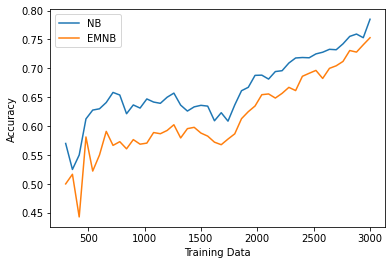

In [ ]:
import matplotlib.pyplot as plt
print(nbperform)
print(nbemperform)
nlist = [x*3 for x in list(range(100, 1001, 20))]
plt.plot(nlist, nbperform)
plt.plot(nlist, nbemperform)
plt.xlabel('Training Data')
plt.ylabel('Accuracy')
plt.legend(['NB','EMNB'])

In [ ]:
from pprint import pprint

train_data_3 = []
train_target_3 = []
test_data_3 = []
test_target_3 = []

for i in range(500):
    #train_data_n.append(nlist[i])
    #train_data_n.append(inlist[i])
    train_data_3.append(mlist[i])
    train_data_3.append(blist[i])
    train_data_3.append(islist[i])
    train_target_3.extend([0,1,2])
for i in range(250):
    #test_data_n.append(nlist[i])
    #test_data_n.append(inlist[i])
    test_data_3.append(mlist[i])
    test_data_3.append(blist[i])
    test_data_3.append(islist[i])
    test_target_3.extend([0,1,2])

test_target_3 = np.array(test_target_3)
train_target_3 = np.array(train_target_3)
stop_words = stopwords.words('english')

In [ ]:
#train_data_clean_3 = map(remove_noise, train_data_3)
#test_data_clean_3 = map(remove_noise, test_data_3)
train_data_clean_3 = train_data_3
test_data_clean_3 = test_data_3
# Convert all text data into tf-idf vectors
vectorizer_3 = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.95)
# vectorizer = TfidfVectorizer()
train_vec_3 = vectorizer_3.fit_transform(train_data_clean_3)
test_vec_3 = vectorizer_3.transform(test_data_clean_3)
print(train_vec_3.shape, test_vec_3.shape)
n_train_data_3 = train_vec_3.shape[0]
split_ratio = 0.25 # labeled vs total(labeled+unlabeled)
X_l_3, X_u_3, y_l_3, y_u_3 = train_test_split(train_vec_3, np.array(train_target_3), test_size=split_ratio, stratify=np.array(train_target_3))
print(X_l_3.shape, X_u_3.shape)
nb_clf_3 = MultinomialNB(alpha=1e-2)
nb_clf_3.fit(X_l_3, y_l_3)
cross_validation(nb_clf_3, X_l_3, y_l_3)
#em_nb_clf_3 = Semi_EM_MultinomialNB(alpha=1e-2) # semi supervised EM based Naive Bayes classifier
#em_nb_clf_3.fit(X_l_3, y_l_3, X_u_3)
pred_3 = nb_clf_3.predict(test_vec_3)
print(metrics.classification_report(np.array(test_target_3), pred_3, target_names=['m','b','i']))
# pprint(metrics.confusion_matrix(test_Xy.target, pred))
print(metrics.accuracy_score(np.array(test_target_3), pred_3))

(1500, 798) (750, 798)
(1125, 798) (375, 798)
Validation: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
Fold # 1
Fold # 2
Fold # 3
Fold # 4
Fold # 5
Validation time: 0.011 seconds
Average training accuracy: 0.680
              precision    recall  f1-score   support

           m       0.75      0.81      0.78       250
           b       0.81      0.70      0.75       250
           i       0.89      0.95      0.92       250

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750

0.8173333333333334


In [ ]:
nbperform_3 = []
nbemperform_3 = []
for i in range(100, 501, 10):
    vectorizer_3 = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.9)
    # vectorizer = TfidfVectorizer()
    train_vec_3 = vectorizer_3.fit_transform(train_data_3[:i*2])
    test_vec_3 = vectorizer_3.transform(test_data_3[:(i)])
    #print(train_vec.shape, test_vec.shape)
    # Divide train data set into labeled and unlabeled data sets
    n_train_data_3 = train_vec_3.shape[0]
    split_ratio = 0.25 # labeled vs unlabeled
    X_l_3, X_u_3, y_l_3, y_u_3 = train_test_split(train_vec_3, train_target_3[:i*2], test_size=split_ratio, stratify=train_target_3[:i*2])
    nb_clf_3 = MultinomialNB(alpha=1e-2)
    nb_clf_3.fit(X_l_3, y_l_3)
    em_nb_clf_3 = Semi_EM_MultinomialNB(alpha=1e-2) # semi supervised EM based Naive Bayes classifier
    em_nb_clf_3.fit(X_l_3, y_l_3, X_u_3)
    pred_1_3 = nb_clf_3.predict(test_vec_3)
    #print(metrics.accuracy_score(test_target_n[:(i*2)], pred_1))
    nbperform_3.append(metrics.accuracy_score(test_target_3[:(i)], pred_1_3))
    pred_2_3 = em_nb_clf_3.predict(test_vec_3)
    #print(metrics.accuracy_score(test_target_n[:(i*2)], pred_2))
    nbemperform_3.append(metrics.accuracy_score(test_target_3[:(i)], pred_2_3))
    print('----------')

[0.9, 0.9, 0.9, 0.9307692307692308, 0.8714285714285714, 0.8933333333333333, 0.8625, 0.9176470588235294, 0.9111111111111111, 0.9473684210526315, 0.915, 0.9, 0.9090909090909091, 0.908695652173913, 0.9, 0.904, 0.9115384615384615, 0.9, 0.9107142857142857, 0.8931034482758621, 0.9, 0.9096774193548387, 0.896875, 0.8666666666666667, 0.9029411764705882, 0.8857142857142857, 0.8805555555555555, 0.8756756756756757, 0.8947368421052632, 0.8846153846153846, 0.885, 0.8804878048780488, 0.8714285714285714, 0.8767441860465116, 0.8954545454545455, 0.88, 0.8913043478260869, 0.8829787234042553, 0.9083333333333333, 0.889795918367347, 0.876]
[0.88, 0.8909090909090909, 0.8833333333333333, 0.9153846153846154, 0.8571428571428571, 0.8866666666666667, 0.83125, 0.9058823529411765, 0.8833333333333333, 0.9052631578947369, 0.895, 0.8952380952380953, 0.9181818181818182, 0.8869565217391304, 0.8916666666666667, 0.904, 0.9076923076923077, 0.9, 0.8928571428571429, 0.8724137931034482, 0.8966666666666666, 0.8838709677419355,

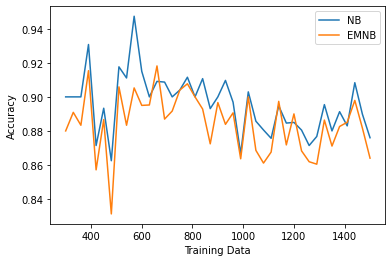

In [ ]:
import matplotlib.pyplot as plt
print(nbperform_3)
print(nbemperform_3)
print([x*3 for x in list(range(100, 501, 10))])
nlist_3 = [x*3 for x in list(range(100, 501, 10))]
plt.plot(nlist_3, nbperform_3)
plt.plot(nlist_3, nbemperform_3)
plt.xlabel('Training Data')
plt.ylabel('Accuracy')
plt.legend(['NB','EMNB'])

In [ ]:
print(nbperform[-1])
print(nbperform_3[-1])

0.767
0.876


In [ ]:
import glob

allCSVs = glob.glob("*_ss.csv")
fli = []
for filename in allCSVs:
    temp_df = pd.read_csv(filename, index_col=None, header=0)
    temp_df['source'] = pd.Series([filename.split('_')[0]]*temp_df.shape[0])
    fli.append(temp_df)
df_old = pd.concat(fli, axis=0, ignore_index=True)
df_old.shape
df_old.to_csv('sents_old.csv', encoding='utf-8', index=False)

In [ ]:
df_old = pd.read_csv('sents_old.csv')

In [ ]:
df= df_old

In [ ]:
stop_words = stopwords.words('english')
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.9)
train_data_clean = map(remove_noise2, train_data_n)
train_vec = vectorizer.fit_transform(train_data_clean)
nb_clf = MultinomialNB(alpha=1e-2)
nb_clf.fit(train_vec, train_target_n)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [ ]:
sentences = df.sentence.values.tolist()
sentences = [str(x) for x in sentences]
cleandata_train = [remove_noise2(x) for x in sentences]
traindata = [gensim.utils.simple_preprocess(str(x), deacc=True) for x in cleandata_train]
# Build the bigram and trigram models
bigram = gensim.models.Phrases(traindata, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[traindata], threshold=100)# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(traindata)# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
data_words_trigrams = make_trigrams(data_words_bigrams)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])# Do lemmatization keeping only noun, adj, vb, adv
#nlp = en_core_web_sm.load()
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
sentences_clean = [' '.join(x) for x in data_lemmatized]

In [ ]:
all_vec = vectorizer.transform(sentences_clean)
pred = nb_clf.predict(all_vec)
df['informative'] = pred

In [ ]:
pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
df

,tool,sentence,neg,pos,neu,com,source,informative
0,appdynamics,AppDynamics Announces Winter '16 Release!AppDy...,0.000,0.108,0.892,0.4389,Archived\dzone,1
1,appdynamics,The Winter ’16 Release (4.2) was announced at ...,0.000,0.113,0.887,0.9042,Archived\dzone,1
2,appdynamics,AppDynamics Introduces Support for SAPAppDynam...,0.026,0.234,0.740,0.9022,Archived\dzone,1
3,appdynamics,With the SAP platform currently handling 77% o...,0.000,0.091,0.909,0.3612,Archived\dzone,1
4,appdynamics,"In fact, Chief Strategy Officer, Thomas Wyatt ...",0.000,0.103,0.897,0.1531,Archived\dzone,1
...,...,...,...,...,...,...,...,...
92974,zipkin,Spring Web annotations,0.000,0.000,1.000,0.0000,Archived\stackoverflow,0
92975,zipkin,Spring framework annotations,0.000,0.000,1.000,0.0000,Archived\stackoverflow,0
92976,zipkin,More spring framework annotations,0.000,0.000,1.000,0.0000,Archived\stackoverflow,0
92977,zipkin,You can use Apache NiFi's built-in provenance ...,0.000,0.000,1.000,0.0000,Archived\stackoverflow,0


In [ ]:
df_noninfo = df.loc[df['informative']==1,:]
df_noninfo.to_csv('sents_info_again.csv', index=False)

In [ ]:
df.loc[(df['informative']!=0) & (df['informative']!=1),:]

,tool,sentence,neg,pos,neu,com,source,informative


In [ ]:
df_info = pd.read_csv('sents_info_aspect.csv')
#df_info.drop(columns=['x'], axis=1, inplace=True)
df_info.shape

(52405, 9)

In [ ]:
df_info.head()

,tool,sentence,neg,pos,neu,com,source,informative,aspect
0,appdynamics,Such platforms leverage large collections of d...,0.0,0.000,1.0,0.0000,medium,1.0,1
1,appdynamics,This allows IT teams to be able to spot issues...,0.0,0.000,1.0,0.0000,medium,1.0,1
2,appdynamics,AIOps platforms also provide traditional histo...,0.0,0.000,1.0,0.0000,medium,1.0,0
3,appdynamics,They work by aggregating observational data (t...,0.0,0.107,0.893,0.4588,medium,1.0,0
4,appdynamics,The platform then implements comprehensive ana...,0.0,0.182,0.818,0.2500,medium,1.0,1


In [ ]:
vectorizer_3 = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.9)
train_data_clean_3 = map(remove_noise2, train_data_3)
train_vec_3 = vectorizer_3.fit_transform(train_data_clean_3)
nb_clf_3 = MultinomialNB(alpha=1e-2)
nb_clf_3.fit(train_vec_3, train_target_3)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [ ]:
sentences_3 = df_info.sentence.values.tolist()
sentences_3 = [str(x) for x in sentences_3]
cleandata_train_3 = [remove_noise2(x) for x in sentences_3]
traindata_3 = [gensim.utils.simple_preprocess(str(x), deacc=True) for x in cleandata_train_3]
# Build the bigram and trigram models
bigram_3 = gensim.models.Phrases(traindata_3, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram_3 = gensim.models.Phrases(bigram_3[traindata_3], threshold=100)# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod_3 = gensim.models.phrases.Phraser(bigram_3)
trigram_mod_3 = gensim.models.phrases.Phraser(trigram_3)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Remove Stop Words
data_words_nostops_3 = remove_stopwords(traindata_3)# Form Bigrams
data_words_bigrams_3 = make_bigrams(data_words_nostops_3)# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
data_words_trigrams_3 = make_trigrams(data_words_bigrams_3)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])# Do lemmatization keeping only noun, adj, vb, adv
#nlp = en_core_web_sm.load()
data_lemmatized_3 = lemmatization(data_words_trigrams_3, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
sentences_clean_3 = [' '.join(x) for x in data_lemmatized_3]

In [ ]:
all_vec_3 = vectorizer_3.transform(sentences_clean_3)
pred_3 = nb_clf_3.predict(all_vec_3)
df_info['aspect'] = pred_3

In [ ]:
df_info.to_csv('sents_info_aspect.csv',encoding='utf-8',index=False)

In [ ]:
df_info.head()

,tool,sentence,neg,pos,neu,com,source,informative,aspect
0,appdynamics,Such platforms leverage large collections of d...,0.0,0.000,1.0,0.0000,medium,1.0,1
1,appdynamics,This allows IT teams to be able to spot issues...,0.0,0.000,1.0,0.0000,medium,1.0,1
2,appdynamics,AIOps platforms also provide traditional histo...,0.0,0.000,1.0,0.0000,medium,1.0,0
3,appdynamics,They work by aggregating observational data (t...,0.0,0.107,0.893,0.4588,medium,1.0,0
4,appdynamics,The platform then implements comprehensive ana...,0.0,0.182,0.818,0.2500,medium,1.0,1


<h1>***********</h1>
<h1>HERE is LDA</h1>
<h1>***********</h1>

In [ ]:
import numpy as np
import tqdm
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer


grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

def compute_coherence_values(corpus_p, data_words_p, id2word_p, k):# a='auto', b='auto'): 
    lda_model = gensim.models.LdaMulticore(corpus=corpus_p,
                                           id2word=id2word_p,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           #alpha='auto',
                                           #eta='auto',
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_p, dictionary=id2word_p, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [ ]:
def preprocessing(sentlist):
    cleandata_train = [remove_noise2(x) for x in sentlist]
    traindata = [gensim.utils.simple_preprocess(str(x), deacc=True) for x in cleandata_train]
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(traindata, min_count=5, threshold=100)  # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[traindata],
                                    threshold=100)  # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    # Remove Stop Words
    data_words_nostops = remove_stopwords(traindata)  # Form Bigrams
    data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops] #make_bigrams(data_words_nostops)  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])# Do lemmatization keeping only noun, adj, vb, adv
    #nlp = en_core_web_sm.load()
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB'])
    #labeled_ready_text = [' '.join(x) for x in data_lemmatized]
    return data_lemmatized

def preprocessing_nva(sentlist):
    cleandata_train = [remove_noise2(x) for x in sentlist]
    traindata = [gensim.utils.simple_preprocess(str(x), deacc=True) for x in cleandata_train]
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(traindata, min_count=5, threshold=100)  # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[traindata],
                                    threshold=100)  # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    # Remove Stop Words
    data_words_nostops = remove_stopwords(traindata)  # Form Bigrams
    data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops] #make_bigrams(data_words_nostops)  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])# Do lemmatization keeping only noun, adj, vb, adv
    #nlp = en_core_web_sm.load()
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB', 'ADJ'])
    #labeled_ready_text = [' '.join(x) for x in data_lemmatized]
    return data_lemmatized

In [ ]:
df_m = df_info.loc[df_info['aspect']==0, :]
df_b = df_info.loc[df_info['aspect']==1, :] 
df_i = df_info.loc[df_info['aspect']==2, :]
print(df_m.shape)
print(df_b.shape)
print(df_i.shape)

(23849, 9)
(17592, 9)
(10964, 9)


In [ ]:
import re
df_m.loc[:,'text_processed'] = df_m['sentence'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df_m.loc[:,'text_processed'] = df_m['text_processed'].map(lambda x: str(x).lower())
df_b.loc[:,'text_processed'] = df_b['sentence'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df_b.loc[:,'text_processed'] = df_b['text_processed'].map(lambda x: str(x).lower())
df_i.loc[:,'text_processed'] = df_i['sentence'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df_i.loc[:,'text_processed'] = df_i['text_processed'].map(lambda x: str(x).lower())

In [ ]:
import re
df_info.loc[:,'text_processed'] = df_info['sentence'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df_info.loc[:,'text_processed'] = df_info['text_processed'].map(lambda x: str(x).lower())

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
df_m_list = df_m.text_processed.values.tolist()
df_m_words = list(preprocessing_nva(df_m_list))
df_b_list = df_b.text_processed.values.tolist()
df_b_words = list(preprocessing_nva(df_b_list))
df_i_list = df_i.text_processed.values.tolist()
df_i_words = list(preprocessing_nva(df_i_list))

# Create Dictionary
#id2word = corpora.Dictionary(data_lemmatized)
id2word_m = corpora.Dictionary(df_m_words)
id2word_b = corpora.Dictionary(df_b_words)
id2word_i = corpora.Dictionary(df_i_words)

# Create Corpus
#texts = data_lemmatized
texts_m = df_m_words
texts_b = df_b_words
texts_i = df_i_words

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
df_list = df_info.text_processed.values.tolist()
df_words = list(preprocessing_nva(df_list))
id2word = corpora.Dictionary(df_words)
texts = df_words

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Term Document Frequency
corpus_m = [id2word_m.doc2bow(text) for text in texts_m]
corpus_b = [id2word_b.doc2bow(text) for text in texts_b]
corpus_i = [id2word_i.doc2bow(text) for text in texts_i]

In [ ]:
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
def testTopicNumberK(nup, ndown, corpus, dfwords, id2word, resultsdict):
    # Can take a long time to run
    if 1 == 1:
        pbar = tqdm.tqdm(total=ndown-nup+1)
        for k in range(nup,ndown):
            cv = compute_coherence_values(corpus, dfwords, id2word, k=k)
            resultsdict['Topics'].append(k)
            resultsdict['Coherence'].append(cv)   
            pbar.update(1)
        df_resultsdict = pd.DataFrame(resultsdict)#.to_csv('lda_tuning_results.csv', index=False)
        pbar.close()

In [ ]:
df_m_p = df_m.loc[df_m['com']>0,:]
df_m_n = df_m.loc[df_m['com']<0,:]
df_m_p_list = df_m_p.text_processed.values.tolist()
df_m_p_words = list(preprocessing_nva(df_m_p_list))
df_m_n_list = df_m_n.text_processed.values.tolist()
df_m_n_words = list(preprocessing_nva(df_m_n_list))
id2word_m_p = corpora.Dictionary(df_m_p_words)
id2word_m_n = corpora.Dictionary(df_m_n_words)
texts_m_p = df_m_p_words
texts_m_n = df_m_n_words
corpus_m_p = [id2word_m_p.doc2bow(text) for text in texts_m_p]
corpus_m_n = [id2word_m_n.doc2bow(text) for text in texts_m_n]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
print(df_m_p.shape)
print(df_m_n.shape)

(11752, 10)
(2539, 10)


In [ ]:
import seaborn as sns
model_results_m_p = {'Topics': [], 'Coherence': []}
model_results_m_n = {'Topics': [], 'Coherence': []}

In [ ]:
import seaborn as sns
########################
model_results = {'Topics': [], 'Coherence': []}

 97%|█████████▋| 29/30 [2:22:39<04:55, 295.14s/it]


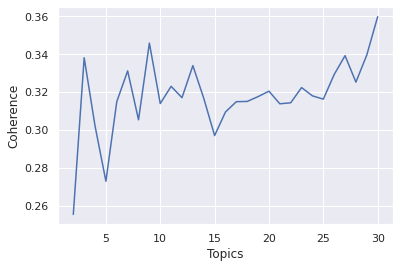

In [ ]:
testTopicNumberK(2,31,corpus, df_words, id2word, model_results)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results)

In [ ]:
testTopicNumberK(31,51,corpus, df_words, id2word, model_results)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results)

 86%|████████▌ | 18/21 [2:34:56<29:12, 584.18s/it]

In [ ]:
#testTopicNumberK(41,51,corpus, df_words, id2word, model_results)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results)

NameError: ignored

 91%|█████████ | 10/11 [1:36:24<09:38, 578.46s/it]


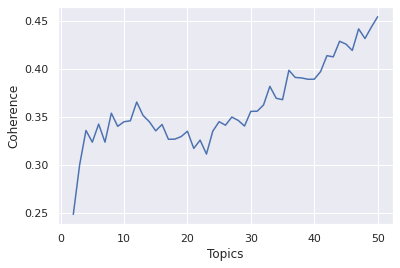

In [ ]:
testTopicNumberK(41,51,corpus, df_words, id2word, model_results)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results)

In [ ]:
model_results

{'Coherence': [0.2550670095866663,
  0.2896674741008729,
  0.33816791917629496,
  0.3164644761339522,
  0.33594943917670034,
  0.32908011289657557,
  0.3661963304915037,
  0.33857511617981484,
  0.3500324861360065,
  0.3495929986807995,
  0.36743529950627235,
  0.35426139059262274,
  0.3398765975086558,
  0.3323897668102061,
  0.3432888794669325,
  0.34115346712248457,
  0.3400357702469672,
  0.3194569573127881,
  0.33853763733574527,
  0.3238862129794917,
  0.31989570650126403,
  0.3209119777587265,
  0.3276264086325695,
  0.3256536891543591,
  0.3455050913858624,
  0.3688021153564776],
 'Topics': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27]}

 97%|█████████▋| 30/31 [37:33<01:15, 75.12s/it]


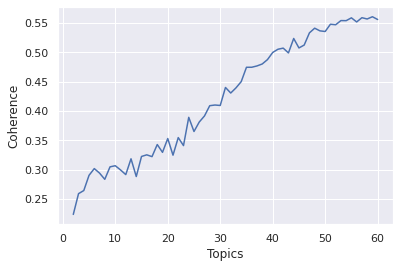

In [ ]:
testTopicNumberK(31,61,corpus_m_p, df_m_p_words, id2word_m_p, model_results_m_p)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results_m_p)

 97%|█████████▋| 30/31 [07:44<00:15, 15.48s/it]


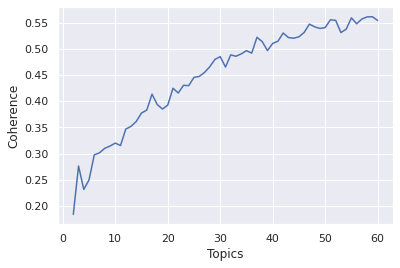

In [ ]:
testTopicNumberK(31,61,corpus_m_n, df_m_n_words, id2word_m_n, model_results_m_n)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results_m_n)

In [ ]:
print(df_m_p.shape)
print(df_m_n.shape)

(11752, 10)
(2539, 10)


In [ ]:
model_results_b = {'Topics': [], 'Coherence': []}

In [ ]:
testTopicNumberK(2,31,corpus_b, df_b_words, id2word_b, model_results_b)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results_b)

In [ ]:
model_results_i = {'Topics': [], 'Coherence': []}

In [ ]:
#model_results_i = {'Topics': [], 'Coherence': []}
testTopicNumberK(31,61,corpus_i, df_i_words, id2word_i, model_results_i)
sns.set(style="darkgrid")
sns.lineplot(x="Topics",y="Coherence", data=model_results_i)

In [ ]:
temp = zip(model_results_n['Topics'],model_results_n['Coherence'])
for item in list(temp):
    print(item)

In [ ]:
# Build LDA model [Motivation Positive]
lda_model_m_p = gensim.models.LdaMulticore(corpus=corpus_m_p, id2word=id2word_m_p, num_topics=7, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       #alpha='auto',
                                       #eta='auto',
                                       per_word_topics=True)
for topic in lda_model_m_p.print_topics():
    print(topic)

(0, '0.046*"team" + 0.025*"security" + 0.019*"development" + 0.019*"work" + 0.019*"responsible" + 0.016*"add" + 0.015*"software" + 0.014*"scale" + 0.013*"datum" + 0.012*"way"')
(1, '0.033*"service" + 0.032*"would" + 0.025*"request" + 0.024*"datum" + 0.023*"number" + 0.019*"event" + 0.018*"solve" + 0.017*"cost" + 0.015*"task" + 0.015*"need"')
(2, '0.032*"customer" + 0.024*"value" + 0.023*"improve" + 0.023*"user" + 0.021*"business" + 0.021*"way" + 0.019*"easy" + 0.018*"make" + 0.018*"benefit" + 0.015*"create"')
(3, '0.055*"microservice" + 0.042*"architecture" + 0.039*"tool" + 0.034*"use" + 0.028*"application" + 0.025*"solution" + 0.022*"great" + 0.018*"support" + 0.018*"good" + 0.017*"production"')
(4, '0.038*"application" + 0.030*"service" + 0.021*"microservice" + 0.018*"cloud" + 0.017*"run" + 0.015*"build" + 0.015*"use" + 0.015*"deploy" + 0.013*"test" + 0.013*"system"')
(5, '0.039*"help" + 0.024*"application" + 0.024*"performance" + 0.022*"time" + 0.020*"would" + 0.019*"may" + 0.018*"c

In [ ]:
# Build LDA model [Motivation Negative]
lda_model_m_n = gensim.models.LdaMulticore(corpus=corpus_m_n, id2word=id2word_m_n, num_topics=3, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       #alpha='auto',
                                       #eta='auto',
                                       per_word_topics=True)
for topic in lda_model_m_n.print_topics():
    print(topic)

(0, '0.026*"microservice" + 0.018*"service" + 0.015*"time" + 0.013*"application" + 0.012*"use" + 0.011*"difficult" + 0.009*"architecture" + 0.008*"datum" + 0.008*"failure" + 0.008*"team"')
(1, '0.012*"failure" + 0.012*"go" + 0.011*"cause" + 0.011*"cloud" + 0.010*"cost" + 0.010*"performance" + 0.008*"see" + 0.008*"security" + 0.007*"low" + 0.007*"common"')
(2, '0.042*"problem" + 0.021*"application" + 0.015*"performance" + 0.014*"system" + 0.014*"error" + 0.012*"solve" + 0.012*"deploy" + 0.011*"service" + 0.010*"user" + 0.009*"experience"')


In [ ]:
# Build LDA model [Issues]
lda_model_i = gensim.models.LdaMulticore(corpus=corpus_i, id2word=id2word_i, num_topics=6, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       #alpha='auto',
                                       #eta='auto',
                                       per_word_topics=True)
for topic in lda_model_i.print_topics():
    print(topic)

(0, '0.087*"jaeger" + 0.070*"agent" + 0.037*"use" + 0.034*"application" + 0.034*"run" + 0.024*"container" + 0.023*"server" + 0.018*"host" + 0.017*"configuration" + 0.016*"trace"')
(1, '0.044*"problem" + 0.038*"work" + 0.026*"appear" + 0.021*"issue" + 0.019*"change" + 0.016*"make" + 0.015*"find" + 0.013*"dependency" + 0.013*"query" + 0.012*"face"')
(2, '0.035*"support" + 0.022*"integration" + 0.021*"memory" + 0.018*"documentation" + 0.018*"endpoint" + 0.016*"context" + 0.016*"tracing" + 0.016*"unable" + 0.015*"resource" + 0.015*"second"')
(3, '0.098*"datadog" + 0.060*"metric" + 0.039*"use" + 0.034*"create" + 0.020*"operator" + 0.019*"name" + 0.018*"try" + 0.018*"custom" + 0.017*"cluster" + 0.014*"quot"')
(4, '0.045*"send" + 0.043*"error" + 0.040*"trace" + 0.034*"log" + 0.027*"span" + 0.025*"use" + 0.023*"would" + 0.020*"request" + 0.018*"server" + 0.018*"able"')
(5, '0.091*"service" + 0.041*"request" + 0.039*"see" + 0.030*"follow" + 0.021*"trace" + 0.020*"call" + 0.017*"connection" + 0.

In [ ]:
# Build LDA model [Benefits]
lda_model_b = gensim.models.LdaMulticore(corpus=corpus_b, id2word=id2word_b, num_topics=4, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       #alpha='auto',
                                       #eta='auto',
                                       per_word_topics=True)
for topic in lda_model_b.print_topics():
    print(topic)

(0, '0.029*"use" + 0.020*"would" + 0.019*"metric" + 0.019*"create" + 0.014*"alert" + 0.013*"time" + 0.013*"datum" + 0.012*"display" + 0.012*"log" + 0.012*"spring"')
(1, '0.021*"service" + 0.019*"provide" + 0.019*"agent" + 0.019*"use" + 0.017*"work" + 0.015*"application" + 0.015*"allow" + 0.015*"support" + 0.012*"cloud" + 0.011*"feature"')
(2, '0.041*"datadog" + 0.031*"monitor" + 0.026*"application" + 0.025*"use" + 0.020*"monitoring" + 0.018*"tool" + 0.017*"log" + 0.017*"performance" + 0.016*"generate" + 0.015*"time"')
(3, '0.051*"trace" + 0.039*"service" + 0.022*"request" + 0.020*"use" + 0.019*"jaeger" + 0.018*"application" + 0.017*"microservice" + 0.014*"call" + 0.013*"server" + 0.012*"distribute"')


In [ ]:
for topic in lda_model_b.print_topics():
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['use', 'would', 'metric', 'create', 'alert', 'time', 'datum', 'display', 'log', 'spring']
['service', 'provide', 'agent', 'use', 'work', 'application', 'allow', 'support', 'cloud', 'feature']
['datadog', 'monitor', 'application', 'use', 'monitoring', 'tool', 'log', 'performance', 'generate', 'time']
['trace', 'service', 'request', 'use', 'jaeger', 'application', 'microservice', 'call', 'server', 'distribute']


In [ ]:
for topic in lda_model_m_p.print_topics():
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['team', 'security', 'development', 'work', 'responsible', 'add', 'software', 'scale', 'datum', 'way']
['service', 'would', 'request', 'datum', 'number', 'event', 'solve', 'cost', 'task', 'need']
['customer', 'value', 'improve', 'user', 'business', 'way', 'easy', 'make', 'benefit', 'create']
['microservice', 'architecture', 'tool', 'use', 'application', 'solution', 'great', 'support', 'good', 'production']
['application', 'service', 'microservice', 'cloud', 'run', 'build', 'use', 'deploy', 'test', 'system']
['help', 'application', 'performance', 'time', 'would', 'may', 'code', 'implement', 'come', 'want']
['time', 'increase', 'developer', 'complexity', 'try', 'get', 'grow', 'may', 'value', 'take']


In [ ]:
for topic in lda_model_m_n.print_topics():
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['microservice', 'service', 'time', 'application', 'use', 'difficult', 'architecture', 'datum', 'failure', 'team']
['failure', 'go', 'cause', 'cloud', 'cost', 'performance', 'see', 'security', 'low', 'common']
['problem', 'application', 'performance', 'system', 'error', 'solve', 'deploy', 'service', 'user', 'experience']


In [ ]:
for topic in lda_model_i.print_topics():
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['jaeger', 'agent', 'use', 'application', 'run', 'container', 'server', 'host', 'configuration', 'trace']
['problem', 'work', 'appear', 'issue', 'change', 'make', 'find', 'dependency', 'query', 'face']
['support', 'integration', 'memory', 'documentation', 'endpoint', 'context', 'tracing', 'unable', 'resource', 'second']
['datadog', 'metric', 'use', 'create', 'operator', 'name', 'try', 'custom', 'cluster', 'quot']
['send', 'error', 'trace', 'log', 'span', 'use', 'would', 'request', 'server', 'able']
['service', 'request', 'see', 'follow', 'trace', 'call', 'connection', 'get', 'method', 'response']


In [ ]:
# Build LDA model [ALL]
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=12, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       #alpha='auto',
                                       #eta='auto',
                                       per_word_topics=True)

In [ ]:
for topic in lda_model.print_topics(num_words=20):
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['time', 'show', 'query', 'memory', 'take', 'response', 'easy', 'cpu', 'make', 'alert', 'load', 'part', 'account', 'look', 'format', 'sample', 'high', 'count', 'small', 'state']
['work', 'give', 'index', 'last', 'network', 'look', 'come', 'happen', 'comma', 'time', 'team', 'real', 'occur', 'task', 'individual', 'management', 'important', 'attempt', 'wonder', 'make']
['error', 'would', 'find', 'documentation', 'http', 'dcat', 'status', 'stack', 'backend', 'detail', 'mention', 'page', 'say', 'exception', 'search', 'key', 'like', 'common', 'full', 'place']
['name', 'specify', 'value', 'add', 'appear', 'option', 'thing', 'connection', 'file', 'machine', 'second', 'dimensional', 'test', 'instal', 'import', 'communicate', 'lot', 'jki', 'create', 'expect']
['metric', 'server', 'set', 'application', 'container', 'run', 'use', 'provide', 'send', 'configure', 'information', 'may', 'instance', 'custom', 'distribution', 'generate', 'multiple', 'need', 'specific', 'collector']
['follow', 'try', 'wa

In [ ]:
for topic in lda_model.print_topics(num_words=20):
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['datadog', 'jaeger', 'use', 'integration', 'configuration', 'system', 'version', 'work', 'backend', 'good', 'available', 'support', 'dependency', 'create', 'way', 'current', 'provide', 'install', 'run', 'latency']
['find', 'set', 'may', 'report', 'alert', 'single', 'default', 'base', 'mean', 'quot', 'function', 'do', 'account', 'useful', 'proxy', 'key', 'traffic', 'individual', 'model', 'standard']
['work', 'look', 'client', 'appear', 'seem', 'implement', 'spring', 'index', 'come', 'node', 'page', 'sample', 'scale', 'tracer', 'define', 'day', 'provider', 'project', 'could', 'feign']
['metric', 'server', 'application', 'monitor', 'use', 'custom', 'memory', 'resource', 'provide', 'monitoring', 'level', 'image', 'usage', 'performance', 'user', 'service', 'dashboard', 'cpu', 'status', 'behavior']
['datum', 'information', 'collect', 'able', 'configure', 'use', 'specify', 'metric', 'take', 'event', 'connection', 'collector', 'method', 'file', 'api', 'access', 'point', 'create', 'context', '

In [ ]:
thewords = []
for topic in lda_model.print_topics(num_words=50):
    thewords.extend([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

In [ ]:
for topic in lda_model.print_topics(num_words=50):
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['time', 'error', 'look', 'index', 'show', 'query', 'memory', 'take', 'response', 'dependency', 'cpu', 'alert', 'machine', 'part', 'load', 'metric', 'dashboard', 'method', 'real', 'display', 'count', 'format', 'state', 'small', 'side', 'slow', 'open', 'result', 'accord', 'high', 'return', 'may', 'cost', 'total', 'post', 'select', 'section', 'example', 'due', 'consume', 'detect', 'save', 'child', 'info', 'enough', 'lose', 'annotation', 'failure', 'comma', 'true']
['work', 'give', 'network', 'opentrace', 'last', 'come', 'happen', 'tool', 'array', 'team', 'unable', 'go', 'day', 'task', 'comma', 'individual', 'several', 'management', 'wonder', 'attempt', 'period', 'make', 'plan', 'cloudwatch', 'many', 'reach', 'address', 'one', 'figure', 'produce', 'important', 'decision', 'design', 'proper', 'jki', 'question', 'goal', 'accessible', 'drop', 'serve', 'grow', 'range', 'mode', 'quot', 'merge', 'situation', 'global', 'assume', 'particular', 'extract']
['would', 'find', 'error', 'doc', 'http', 

In [ ]:
for item in set(thewords):
    print(item)

In [ ]:
df_info.head()

,tool,sentence,neg,pos,neu,com,source,informative,aspect,text_processed
0,appdynamics,Such platforms leverage large collections of d...,0.0,0.000,1.0,0.0000,medium,1.0,1,such platforms leverage large collections of d...
1,appdynamics,This allows IT teams to be able to spot issues...,0.0,0.000,1.0,0.0000,medium,1.0,1,this allows it teams to be able to spot issues...
2,appdynamics,AIOps platforms also provide traditional histo...,0.0,0.000,1.0,0.0000,medium,1.0,0,aiops platforms also provide traditional histo...
3,appdynamics,They work by aggregating observational data (t...,0.0,0.107,0.893,0.4588,medium,1.0,0,they work by aggregating observational data (t...
4,appdynamics,The platform then implements comprehensive ana...,0.0,0.182,0.818,0.2500,medium,1.0,1,the platform then implements comprehensive ana...


In [ ]:
df_info.text_processed[0]

'such platforms leverage large collections of data sourced from various it tools operations devices and analyzes them using ai'

In [ ]:
uniqueWords=set().union(*df_words)

In [ ]:
def makenumOfWords(sentence):
    numOfWords = dict.fromkeys(uniqueWords, 0)
    for word in sentence:
        numOfWords[word] += 1
    return numOfWords

In [ ]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [ ]:
makenumOfWordsList = [makenumOfWords(x) for x in df_words]

In [ ]:
lda_model.save('new12topicmodel')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
def topic_distribution(string_input):
    string_input = [string_input]
    # Fit and transform
    X = .transform(string_input)
 
    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
    output = list(lda_model[corpus])[0]
 
    return output

<h1>New Stuff</h1>


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=9, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       #alpha='auto',
                                       #eta='auto',
                                       per_word_topics=True)

In [ ]:
newModel = gensim.models.LdaMulticore.load('12topicmodel')

In [ ]:
newModel = gensim.models.LdaMulticore.load('9topicmodel')

In [ ]:
for topic in newModel.print_topics(num_words=50):
    print([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

['datadog', 'use', 'support', 'integration', 'specify', 'implement', 'case', 'version', 'opentrace', 'dependency', 'appdynamic', 'tool', 'available', 'envoy', 'feature', 'solution', 'report', 'do', 'instrument', 'mention', 'part', 'tracer', 'face', 'backend', 'apm', 'route', 'work', 'install', 'job', 'key', 'module', 'consider', 'new', 'total', 'post', 'thread', 'entry', 'framework', 'think', 'similar', 'accord', 'section', 'setting', 'good', 'wonder', 'action', 'plan', 'platform', 'discover', 'late']
['would', 'container', 'value', 'look', 'give', 'metric', 'collect', 'make', 'query', 'configure', 'take', 'datum', 'thing', 'could', 'easy', 'api', 'use', 'instrumentation', 'collector', 'go', 'elasticsearch', 'second', 'time', 'record', 'work', 'happen', 'know', 'code', 'may', 'header', 'first', 'function', 'change', 'rest', 'get', 'good', 'config', 'need', 'certain', 'side', 'state', 'track', 'see', 'understand', 'reactive', 'entire', 'place', 'individual', 'information', 'pass']
['met

In [ ]:
topic12 = []
for topic in newModel.print_topics(num_words=50):
    topic12.append([x.split('*')[1].strip('"') for x in topic[1].split(' + ')])

In [ ]:
df_info.head()

,tool,sentence,neg,pos,neu,com,source,informative,text_processed
0,appdynamics,AppDynamics Announces Winter '16 Release!AppDy...,0.000,0.108,0.892,0.4389,Archived\dzone,1,appdynamics announces winter '16 releaseappdyn...
1,appdynamics,The Winter ’16 Release (4.2) was announced at ...,0.000,0.113,0.887,0.9042,Archived\dzone,1,the winter ’16 release (42) was announced at a...
2,appdynamics,AppDynamics Introduces Support for SAPAppDynam...,0.026,0.234,0.740,0.9022,Archived\dzone,1,appdynamics introduces support for sapappdynam...
3,appdynamics,With the SAP platform currently handling 77% o...,0.000,0.091,0.909,0.3612,Archived\dzone,1,with the sap platform currently handling 77% o...
4,appdynamics,"In fact, Chief Strategy Officer, Thomas Wyatt ...",0.000,0.103,0.897,0.1531,Archived\dzone,1,in fact chief strategy officer thomas wyatt st...


In [ ]:
for item in topic12:
    print(', '.join(item))

datadog, use, support, integration, specify, implement, case, version, opentrace, dependency, appdynamic, tool, available, envoy, feature, solution, report, do, instrument, mention, part, tracer, face, backend, apm, route, work, install, job, key, module, consider, new, total, post, thread, entry, framework, think, similar, accord, section, setting, good, wonder, action, plan, platform, discover, late
would, container, value, look, give, metric, collect, make, query, configure, take, datum, thing, could, easy, api, use, instrumentation, collector, go, elasticsearch, second, time, record, work, happen, know, code, may, header, first, function, change, rest, get, good, config, need, certain, side, state, track, see, understand, reactive, entire, place, individual, information, pass
metric, show, appear, memory, time, fail, set, usage, http, index, see, node, create, cpu, documentation, default, single, dashboard, status, process, datum, lot, number, load, count, example, sample, graph, l

In [ ]:
allsentences = df_info.sentence.values.tolist()

In [ ]:
wordlist = list(itertools.chain(*df_words))

In [ ]:
freqwordlist = Counter(wordlist)

In [ ]:
freqworddict_sorted = dict(sorted(freqwordlist.items(), key=lambda item: item[1], reverse=True))

In [ ]:
topic12freqlistofdict = []

for topic in topic12:
    topic12freqlistofdict.append(sorted([(x, freqworddict_sorted[x]) for x in topic], key=lambda item: item[1], reverse=True))

In [ ]:
for item in topic12freqlistofdict:
    print(item)

[('use', 5955), ('tool', 3448), ('datadog', 2258), ('new', 1655), ('support', 1437), ('work', 1385), ('platform', 1337), ('solution', 1248), ('feature', 1098), ('integration', 1083), ('case', 774), ('good', 762), ('part', 757), ('implement', 726), ('key', 703), ('available', 660), ('appdynamic', 654), ('report', 540), ('version', 477), ('plan', 447), ('opentrace', 442), ('backend', 408), ('framework', 376), ('dependency', 372), ('think', 351), ('do', 345), ('consider', 344), ('job', 339), ('specify', 282), ('apm', 276), ('action', 273), ('install', 244), ('instrument', 242), ('post', 222), ('mention', 216), ('face', 210), ('total', 201), ('discover', 196), ('route', 192), ('similar', 188), ('accord', 169), ('thread', 156), ('setting', 140), ('late', 133), ('section', 121), ('module', 114), ('envoy', 109), ('tracer', 103), ('entry', 80), ('wonder', 59)]
[('use', 5955), ('time', 3396), ('datum', 3061), ('metric', 2667), ('need', 2350), ('make', 1902), ('see', 1886), ('container', 1573), 

In [ ]:
wordset = list(set(wordlist))

In [ ]:
# bow means the list of words of a sentence
def calculateTF(wordset,bow):
  termfreq_diz = dict.fromkeys(wordset,0)
  counter1 =  dict(Counter(bow))
  for w in bow:
    termfreq_diz[w]=counter1[w]/len(bow)
  return termfreq_diz

In [ ]:
def calculate_IDF(wordset,bow):
    d_bow = {'bow_{}'.format(i):list(set(b)) for i,b in enumerate(bow)}
    N=len(d_bow.keys())
    l_bow = []
    for b in d_bow.values():
      l_bow+=b
    counter = dict(Counter(l_bow))
    idf_diz=dict.fromkeys(wordset,0)
    for w in wordset:
      idf_diz[w] = np.log((1+N)/(1+counter[w]))+1
    return idf_diz

In [ ]:
def calculate_TF_IDF(wordset,tf_diz,idf_diz):
    tf_idf_diz = dict.fromkeys(wordset,0)
    for w in wordset:
       tf_idf_diz[w]=tf_diz[w]*idf_diz[w]
    tdidf_values = list(tf_idf_diz.values())
    l2_norm = LA.norm(tdidf_values)   
    tf_idf_norm = {w:tf_idf_diz[w]/l2_norm for w in wordset}
    return tf_idf_norm

In [ ]:
idf_diz = calculate_IDF(wordset,df_words)

In [ ]:
idf_diz_sorted = dict(sorted(idf_diz.items(), key=lambda item: item[0], reverse=False))

In [ ]:
dict(sorted(calculateTF(wordset, df_words[0]).items(), key=lambda item: item[0], reverse=False))

In [ ]:

def computeTF():
    totalWordCount = len(wordset)
    wordListSet = wordset
    TFDict = {}
    for item in wordListSet:
        TFDict[item] = len([x for x in wordlist if x==item])/totalWordCount
    return TFDict

def computeIDF():
    wordListSet = wordset
    IDFDict = {}
    for item in wordListSet:
        IDFDict[item] = math.log(len(df_words)/len([x for x in df_words if item in x]))
    return IDFDict

def computeTFIDFScore():
    TFDict = computeTF()
    IDFDict = computeIDF()
    TFIDFDict = {}
    for word in wordlist:
        TFIDFDict[word] = TFDict[word]*IDFDict[word]
    return sorted(TFIDFDict.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
tfidfdict = computeTFIDFScore()

In [ ]:
tfidfdictdict = dict(tfidfdict)

In [ ]:
topic12tfidflistofdict = []

for topic in topic12:
    topic12tfidflistofdict.append(sorted([(x, tfidfdictdict[x]) for x in topic], key=lambda item: item[1], reverse=True))

In [ ]:
for item in topic12tfidflistofdict:
    print([(x[0], round(x[1],3)) for x in item])

[('time', 0.763), ('metric', 0.655), ('error', 0.415), ('may', 0.381), ('load', 0.349), ('take', 0.325), ('real', 0.304), ('response', 0.294), ('example', 0.281), ('look', 0.278), ('alert', 0.272), ('show', 0.265), ('cost', 0.256), ('part', 0.25), ('high', 0.241), ('memory', 0.231), ('dashboard', 0.195), ('state', 0.191), ('small', 0.189), ('query', 0.187), ('result', 0.186), ('failure', 0.17), ('cpu', 0.159), ('slow', 0.154), ('dependency', 0.145), ('machine', 0.144), ('method', 0.14), ('detect', 0.13), ('open', 0.125), ('return', 0.121), ('index', 0.117), ('side', 0.116), ('save', 0.115), ('display', 0.109), ('due', 0.1), ('select', 0.093), ('post', 0.093), ('enough', 0.09), ('total', 0.089), ('consume', 0.084), ('true', 0.078), ('accord', 0.078), ('count', 0.075), ('format', 0.063), ('lose', 0.06), ('section', 0.053), ('info', 0.036), ('annotation', 0.036), ('child', 0.032), ('comma', 0.001)]
[('tool', 0.747), ('team', 0.525), ('make', 0.494), ('work', 0.393), ('go', 0.375), ('many'

In [ ]:
df_words_lemmatization = [' '.join(x) for x in df_words]

In [ ]:
data_vectorized = vectorizer.fit_transform(df_words_lemmatization)

In [ ]:
def format_topics_sentences(theldamodel, thecorpus):
    topicList = []
    # Get main topic in each document
    for i, row in enumerate(theldamodel[corpus]):
        #pprint(row)
        rank = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        print(i)
        highestPer = rank[0][1]
        topTopics = [x for x in rank if x[1]==highestPer]
        if len(topTopics) == 1:
            topicList.append(str(topTopics[0][0]))
        else:
            topicList.append('-'.join([str(x[0]) for x in topTopics]))
    return topicList

In [ ]:
df_info['topic'] = format_topics_sentences(newModel, corpus)

流式输出内容被截断，只能显示最后 5000 行内容。
42439
42440
42441
42442
42443
42444
42445
42446
42447
42448
42449
42450
42451
42452
42453
42454
42455
42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42470
42471
42472
42473
42474
42475
42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
42512
42513
42514
42515
42516
42517
42518
42519
42520
42521
42522
42523
42524
42525
42526
42527
42528
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
42567
42568
42569
42570
42571
42572
42573
42574
42575
42576
42577
42578
42579
42580
42581
42582
42583
42584
42585
42586
42587
42588
42589
42590
42591
42592
42593
42594
42595
42596
42597
42598
42599
42600
4

In [ ]:
df_info.head()

,tool,sentence,neg,pos,neu,com,source,informative,text_processed,topic
0,appdynamics,AppDynamics Announces Winter '16 Release!AppDy...,0.000,0.108,0.892,0.4389,Archived\dzone,1,appdynamics announces winter '16 releaseappdyn...,3
1,appdynamics,The Winter ’16 Release (4.2) was announced at ...,0.000,0.113,0.887,0.9042,Archived\dzone,1,the winter ’16 release (42) was announced at a...,3
2,appdynamics,AppDynamics Introduces Support for SAPAppDynam...,0.026,0.234,0.740,0.9022,Archived\dzone,1,appdynamics introduces support for sapappdynam...,3
3,appdynamics,With the SAP platform currently handling 77% o...,0.000,0.091,0.909,0.3612,Archived\dzone,1,with the sap platform currently handling 77% o...,0
4,appdynamics,"In fact, Chief Strategy Officer, Thomas Wyatt ...",0.000,0.103,0.897,0.1531,Archived\dzone,1,in fact chief strategy officer thomas wyatt st...,0


In [ ]:
def getSentenceNumberPerTopic(thedf_info, topicNumber):
    for i in range(topicNumber):
        print(thedf_info.loc[thedf_info['dominantTopic'].str.contains(str(i)),:].shape)

getSentenceNumberPerTopic(df_info, 9)

(4834, 10)
(4201, 10)
(3583, 10)
(11954, 10)
(4727, 10)
(5126, 10)
(4410, 10)
(5702, 10)
(6338, 10)


In [ ]:
Topics = ['Setup','Instrumentation', 'Performance', 'Monitoring', 'Management', 'Architecture', 'Adjusting', 'Deployment']
ToolList = ['appdynamics', 'elasticapm', 'datadog', 'tanzu', 'stagemonitor', 'instana', 'skywalking', 'lightstep', 'zipkin', 'inspectit', 'jaeger']


In [ ]:
def getTopicNumberListbyTool(thedf_info, toolname, topicNumber):
    theTooldf = thedf_info.loc[thedf_info['tool']==toolname,:]
    topiclist = []
    for i in range(topicNumber):
        topiclist.append(theTooldf.loc[theTooldf['dominantTopic'].str.contains(str(i)),:].shape)
    print(toolname+ " ")
    print(topiclist)

In [ ]:
for item in ToolList:
    getTopicNumberListbyTool(df_info, item, 9)

appdynamics 
[(1157, 10), (1122, 10), (859, 10), (3459, 10), (993, 10), (1342, 10), (1312, 10), (2123, 10), (1517, 10)]
elasticapm 
[(279, 10), (274, 10), (295, 10), (1277, 10), (323, 10), (239, 10), (328, 10), (434, 10), (486, 10)]
datadog 
[(1659, 10), (1195, 10), (1079, 10), (3125, 10), (1081, 10), (1181, 10), (1221, 10), (1442, 10), (1180, 10)]
tanzu 
[(94, 10), (122, 10), (105, 10), (291, 10), (133, 10), (140, 10), (121, 10), (136, 10), (85, 10)]
stagemonitor 
[(9, 10), (4, 10), (10, 10), (32, 10), (9, 10), (5, 10), (4, 10), (4, 10), (14, 10)]
instana 
[(134, 10), (131, 10), (100, 10), (455, 10), (112, 10), (144, 10), (149, 10), (181, 10), (205, 10)]
skywalking 
[(21, 10), (13, 10), (20, 10), (62, 10), (23, 10), (13, 10), (18, 10), (25, 10), (28, 10)]
lightstep 
[(140, 10), (151, 10), (78, 10), (356, 10), (87, 10), (251, 10), (146, 10), (278, 10), (188, 10)]
zipkin 
[(758, 10), (690, 10), (604, 10), (1578, 10), (1232, 10), (1103, 10), (642, 10), (600, 10), (1321, 10)]
inspectit 
[

In [ ]:
df_info.head()

,tool,sentence,neg,pos,neu,com,source,informative,text_processed,dominantTopic
0,appdynamics,AppDynamics Announces Winter '16 Release!AppDy...,0.000,0.108,0.892,0.4389,Archived\dzone,1,appdynamics announces winter '16 releaseappdyn...,3
1,appdynamics,The Winter ’16 Release (4.2) was announced at ...,0.000,0.113,0.887,0.9042,Archived\dzone,1,the winter ’16 release (42) was announced at a...,3
2,appdynamics,AppDynamics Introduces Support for SAPAppDynam...,0.026,0.234,0.740,0.9022,Archived\dzone,1,appdynamics introduces support for sapappdynam...,3
3,appdynamics,With the SAP platform currently handling 77% o...,0.000,0.091,0.909,0.3612,Archived\dzone,1,with the sap platform currently handling 77% o...,0
4,appdynamics,"In fact, Chief Strategy Officer, Thomas Wyatt ...",0.000,0.103,0.897,0.1531,Archived\dzone,1,in fact chief strategy officer thomas wyatt st...,0


In [ ]:
df_t = pd.read_csv('df_info_new_with_topics.csv', lineterminator='\n')
df_t.head()

,tool,sentence,neg,pos,neu,com,source,informative,text_processed,dominantTopic
0,appdynamics,AppDynamics Announces Winter '16 Release!AppDy...,0.000,0.108,0.892,0.4389,Archived\dzone,1,appdynamics announces winter '16 releaseappdyn...,3
1,appdynamics,The Winter ’16 Release (4.2) was announced at ...,0.000,0.113,0.887,0.9042,Archived\dzone,1,the winter ’16 release (42) was announced at a...,3
2,appdynamics,AppDynamics Introduces Support for SAPAppDynam...,0.026,0.234,0.740,0.9022,Archived\dzone,1,appdynamics introduces support for sapappdynam...,3
3,appdynamics,With the SAP platform currently handling 77% o...,0.000,0.091,0.909,0.3612,Archived\dzone,1,with the sap platform currently handling 77% o...,0
4,appdynamics,"In fact, Chief Strategy Officer, Thomas Wyatt ...",0.000,0.103,0.897,0.1531,Archived\dzone,1,in fact chief strategy officer thomas wyatt st...,0


In [ ]:
thepos = df_t.loc[df_t['com']>0,:].shape[0]
theneu = df_t.loc[df_t['com']==0,:].shape[0]
theneg = df_t.loc[df_t['com']<0,:].shape[0]

In [ ]:
thepos

21343

In [ ]:
theneu

19268

In [ ]:
theneg

6828

In [ ]:
print(thepos/df_t.shape[0])
print(theneu/df_t.shape[0])
print(theneg/df_t.shape[0])

0.44990408735428655
0.40616370496848586
0.14393220767722759


In [ ]:
df_t.shape[0]

47439

In [ ]:
df_st = df_info.loc[:,['tool', 'com', 'dominantTopic']]

In [ ]:
df_st.head()

,tool,com,dominantTopic
0,appdynamics,0.4389,3
1,appdynamics,0.9042,3
2,appdynamics,0.9022,3
3,appdynamics,0.3612,0
4,appdynamics,0.1531,0


In [ ]:
def checkPercentageforTool(toolname):
    sentlist = df_st.loc[df_st['tool']==toolname, 'com'].values.tolist()
    thelen = len(sentlist)
    print(len([x for x in sentlist if x>0])/thelen)
    print(len([x for x in sentlist if x==0])/thelen)
    print(len([x for x in sentlist if x<0])/thelen)

In [ ]:
checkPercentageforTool('appdynamics')

0.4790238758755743
0.35738495141974846
0.16359117270467727


In [ ]:
checkPercentageforTool('datadog')

0.4559640522875817
0.4074346405228758
0.13660130718954247


In [ ]:
checkPercentageforTool('elasticapm')

0.45806277056277056
0.3939393939393939
0.1479978354978355


In [ ]:
checkPercentageforTool('inspectit')

0.4508670520231214
0.3352601156069364
0.2138728323699422


In [ ]:
checkPercentageforTool('instana')

0.4667093469910371
0.37708066581306016
0.15620998719590268


In [ ]:
checkPercentageforTool('jaeger')

0.410312764158918
0.462552831783601
0.12713440405748097


In [ ]:
checkPercentageforTool('lightstep')

0.46873025900189513
0.38408085912823753
0.14718888186986734


In [ ]:
checkPercentageforTool('skywalking')

0.3864734299516908
0.4444444444444444
0.16908212560386474


In [ ]:
checkPercentageforTool('stagemonitor')

0.32222222222222224
0.5333333333333333
0.14444444444444443


In [ ]:
checkPercentageforTool('tanzu')

0.4344262295081967
0.4517304189435337
0.11384335154826958


In [ ]:
checkPercentageforTool('zipkin')

0.414187944195841
0.4544617004474862
0.1313503553566728


In [ ]:
df_info.head()

,tool,sentence,neg,pos,neu,com,source,informative,text_processed,topic
0,appdynamics,AppDynamics Announces Winter '16 Release!AppDy...,0.000,0.108,0.892,0.4389,Archived\dzone,1,appdynamics announces winter '16 releaseappdyn...,3
1,appdynamics,The Winter ’16 Release (4.2) was announced at ...,0.000,0.113,0.887,0.9042,Archived\dzone,1,the winter ’16 release (42) was announced at a...,3
2,appdynamics,AppDynamics Introduces Support for SAPAppDynam...,0.026,0.234,0.740,0.9022,Archived\dzone,1,appdynamics introduces support for sapappdynam...,3
3,appdynamics,With the SAP platform currently handling 77% o...,0.000,0.091,0.909,0.3612,Archived\dzone,1,with the sap platform currently handling 77% o...,0
4,appdynamics,"In fact, Chief Strategy Officer, Thomas Wyatt ...",0.000,0.103,0.897,0.1531,Archived\dzone,1,in fact chief strategy officer thomas wyatt st...,0


In [ ]:
skywalkingpositive9 = df_info.loc[(df_info['tool']=='skywalking')&(df_info['topic'].str.contains('0')),'sentence'].values.tolist()

In [ ]:
for item in skywalkingpositive9:
    print(item)

The solution then, somewhat obviously, is that modern programming environments must evolve to support both the theoretical and empirical perspectives of software development.
It requires little to no code changes to implement and is lightweight enough to be used in production.
The Spring framework is not just a one-thread framework and using it may bring potential challenges (Img.7.).
It supports libraries in nine languages, each with a simple interface for instrumenting code so that it can be traced by any vendor or project—such as CNCF Jaeger, LightStep, Apache SkyWalking, and Datadog—that provides an OpenTracing-compatible tracer in that language.
OpenCensus started at Google as part of its internal Census libraries and was released as an open-source tool in January 2018.
Currently, Thundra uses the OpenTracing API to implement instrumentation, and all Thundra tracing agents are OpenTracing-compatible.
Modern computer programs are so large and complex that designing a way to easily 

In [ ]:
print(len(skywalkingpositive9))

21


In [ ]:
skywalkingneutral = df_info.loc[(df_info['tool']=='skywalking')&(df_info['topic'].str.contains('0'))&(df_info['com']>0),'sentence'].values.tolist()

In [ ]:
skywalkingneutral

['The solution then, somewhat obviously, is that modern programming environments must evolve to support both the theoretical and empirical perspectives of software development.',
 'The Spring framework is not just a one-thread framework and using it may bring potential challenges (Img.7.).',
 'It supports libraries in nine languages, each with a simple interface for instrumenting code so that it can be traced by any vendor or project—such as CNCF Jaeger, LightStep, Apache SkyWalking, and Datadog—that provides an OpenTracing-compatible tracer in that language.',
 "You may also like: Six Most Popular Bug Tracking Tools\r\r\r\rModern computer programs are so large and complex that designing a way to easily locate bugs would greatly improve a developer's quality of life.",
 'In the end, the Apollo system produces a bug report that includes:\r\r\r\r The git commit that introduced the performance regression.',
 'This performance was acceptable, considering most containers wouldn’t support ov